# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [155]:
# Importar bibliotecas padrão (nenhuma neste caso)

# Importar bibliotecas de terceiros
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importar pacotes específicos de bibliotecas ou funções
from seaborn import load_dataset
import statsmodels.formula.api as smf

In [157]:
#Carregar base de dados 'tips' do Seaborn
tips = sns.load_dataset('tips')

#Criar coluna de 'Gorjeta Percentual'
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#Criar coluna de 'Gorjeta Líquida'
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


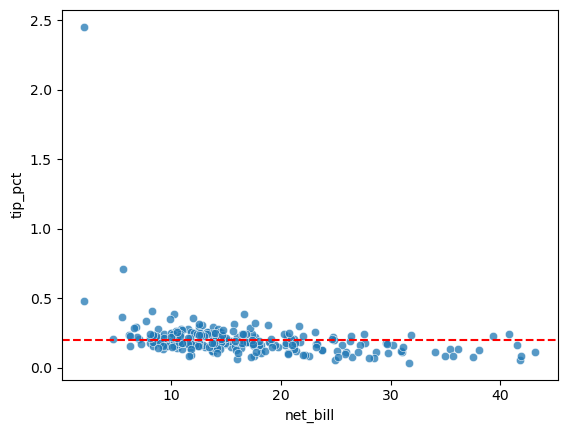

In [159]:
#Plotar um gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)

med_tip_pct = tips['tip_pct'].mean()
plt.axhline(y=med_tip_pct, color='r', linestyle='--')

In [161]:
# Criar o modelo
m1 = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Visualizar detalhes do modelo
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        13:45:22   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

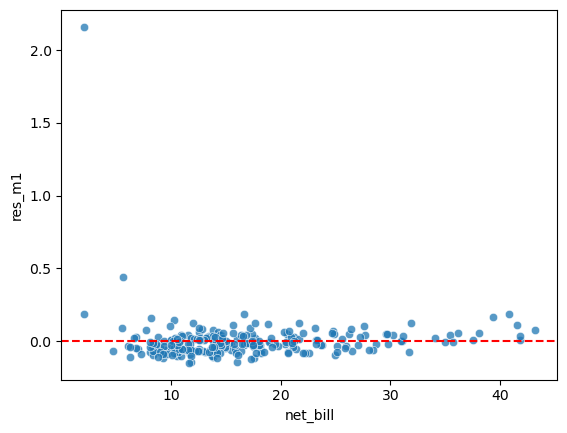

In [163]:
# Armazenar os resíduos do modelo
tips['res_m1'] = m1.resid

# Plotar gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'res_m1', data = tips, alpha = .75)

# Adicionar uma linha
plt.axhline(y=0, color='r', linestyle='--')

In [165]:
#Prever novos dados
d_n = tips[0:5]
m1.predict(d_n)

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [167]:
#Calcular R-Quadrado para o Modelo 1
rs_m1 = m1.rsquared
rs_m1

0.09129084920662978

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.35e-13
Time:                        13:46:00   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.62

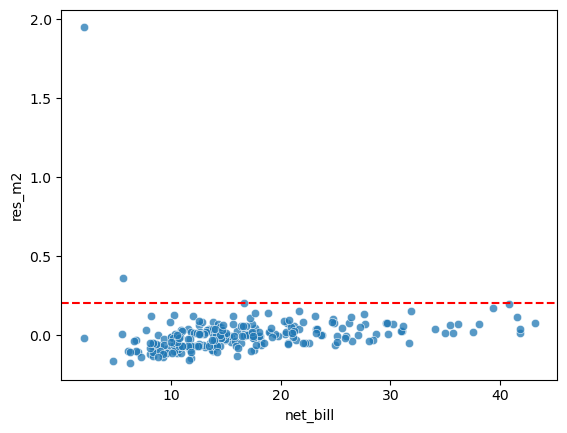

In [169]:
#Ajustar o modelo em função ao logaritimo de net_bill
m2 = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips).fit()
print(m2.summary())
tips['res_m2'] = m2.resid

#Plotar gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'res_m2', data = tips, alpha = .75)
plt.axhline(y=med_tip_pct, color='r', linestyle='--')

In [188]:
#Prever novos dados
d_n = tips[0:5]
m2.predict(d_n)

0    0.193112
1    0.286192
2    0.179131
3    0.155981
4    0.151464
dtype: float64

In [190]:
#Calcular R-Quadrado para o Modelo 2
rs_m2 = m2.rsquared
rs_m2

0.19931858147613013

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        13:57:25   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

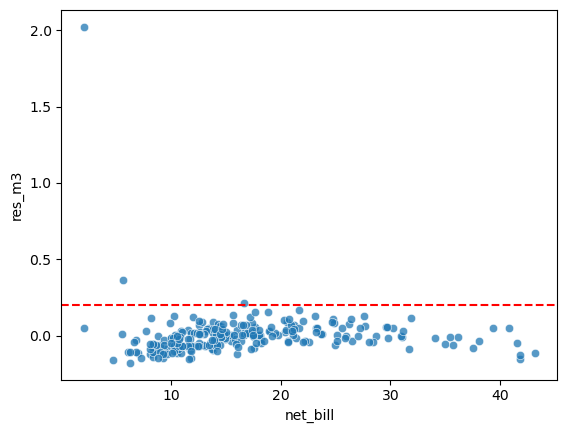

In [194]:
#Ajustar o modelo em função de um polinômio de segundo grau em net_bill
m3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(m3.summary())
tips['res_m3'] = m3.resid

#Plotar gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'res_m3', data = tips, alpha = .75)
plt.axhline(y=med_tip_pct, color='r', linestyle='--')

In [196]:
#Prever novos dados
d_n = tips[0:5]
m3.predict(d_n)

0    0.179867
1    0.288619
2    0.163616
3    0.139319
4    0.135162
dtype: float64

In [198]:
#Calcular R-Quadrado para o Modelo 2
rs_m3 = m3.rsquared
rs_m3

0.15760784734296185

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                              OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + 0.1)   R-squared:                       0.213
Model:                               OLS   Adj. R-squared:                  0.209
Method:                    Least Squares   F-statistic:                     65.35
Date:                   Thu, 12 Sep 2024   Prob (F-statistic):           3.00e-14
Time:                           13:47:46   Log-Likelihood:                -7.1139
No. Observations:                    244   AIC:                             18.23
Df Residuals:                        242   BIC:                             25.22
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9782 

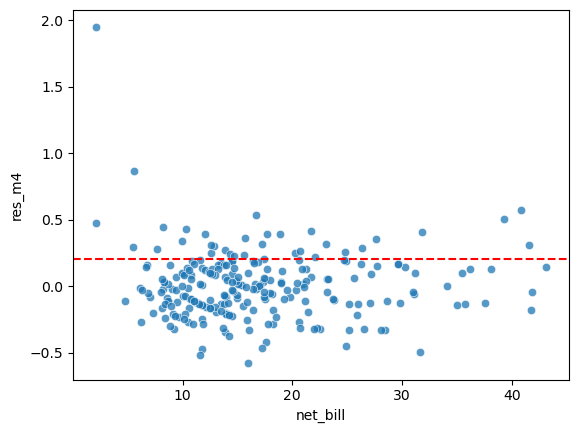

In [175]:
#Ajustar o modelo no log de 'tip_pct' em função de 'net_bill'
m4 = smf.ols('np.log(tip_pct + 0.1) ~ net_bill', data = tips).fit()
print(m4.summary())
tips['res_m4'] = m4.resid

#Plotar gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'res_m4', data = tips, alpha = .75)
plt.axhline(y=med_tip_pct, color='r', linestyle='--')

In [127]:
#Prever novos dados
d_n = tips[0:5]
m4.predict(d_n)

0   -1.236289
1   -1.118388
2   -1.260999
3   -1.307190
4   -1.317042
dtype: float64

In [177]:
#Calcular R-Quadrado para o Modelo 
rs_m4 = m4.rsquared
rs_m4

0.21263042231593254

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                              OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + 0.1)   R-squared:                       0.295
Model:                               OLS   Adj. R-squared:                  0.292
Method:                    Least Squares   F-statistic:                     101.1
Date:                   Thu, 12 Sep 2024   Prob (F-statistic):           4.21e-20
Time:                           13:50:13   Log-Likelihood:                 6.3140
No. Observations:                    244   AIC:                            -8.628
Df Residuals:                        242   BIC:                            -1.634
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


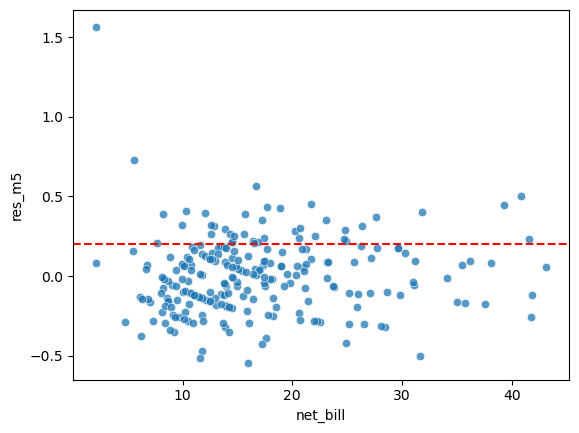

In [179]:
#Ajustar o modelo no log de 'tip_pct' em função do log de 'net_bill'
m5 = smf.ols('np.log(tip_pct + 0.1) ~ np.log(net_bill+.1)', data = tips).fit()
print(m5.summary())
tips['res_m5'] = m5.resid

#Plotar gráfico para visualizar os dados
sns.scatterplot(x = 'net_bill', y = 'res_m5', data = tips, alpha = .75)
plt.axhline(y=med_tip_pct, color='r', linestyle='--')

In [181]:
#Prever novos dados
d_n = tips[0:5]
m5.predict(d_n)

0   -1.268200
1   -1.073314
2   -1.297474
3   -1.345943
4   -1.355401
dtype: float64

In [183]:
#Calcular R-Quadrado para o Modelo 
rs_m5 = m5.rsquared
rs_m5

0.29469322478811444

###  6. qual modelo resultou no melhor ajuste?

In [204]:
# Listar com os valores de R-quadrado de cada modelo
rs_modelos = [rs_m1, rs_m2, rs_m3, rs_m4, rs_m5]

# Loop para imprimir o R-quadrado de cada modelo
for i, rs in enumerate(rs_modelos, start=1):
    print(f'R-Quadrado do Modelo {i}: {rs}')

R-Quadrado do Modelo 1: 0.09129084920662978
R-Quadrado do Modelo 2: 0.19931858147613013
R-Quadrado do Modelo 3: 0.15760784734296185
R-Quadrado do Modelo 4: 0.21263042231593254
R-Quadrado do Modelo 5: 0.29469322478811444


O Modelo 5 apresentou o melhor ajuste, com um R-quadrado de aproximadamente 29%. Isso significa que o modelo explica cerca de 29% da variação dos dados. Embora o R-quadrado não seja muito elevado, ele é o mais alto entre os cinco modelos avaliados, indicando que o Modelo 5 tem o maior poder preditivo em relação aos demais.